In [1]:
import numpy as np
import pandas as pd
import torch
import torchvision
import torchvision.transforms as T
from collections import defaultdict, deque
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection import FasterRCNN
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection import FasterRCNN
from torchvision.models.detection.rpn import AnchorGenerator
from torch.utils.data import DataLoader, Dataset
from torch.utils.data.sampler import SequentialSampler
import torchvision.transforms as transforms
import os,sys,matplotlib,re
from PIL import Image
from skimage import exposure
import matplotlib.pyplot as plt
import matplotlib.image as immg
from torchvision.io import read_image
import matplotlib
from torchvision.utils import draw_bounding_boxes

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
def apply_nms(orig_prediction, iou_thresh=0.2):

    keep = torchvision.ops.nms(orig_prediction['boxes'], orig_prediction['scores'], iou_thresh)
    
    final_prediction = orig_prediction
    final_prediction['boxes'] = final_prediction['boxes'][keep]
    final_prediction['scores'] = final_prediction['scores'][keep]
    final_prediction['labels'] = final_prediction['labels'][keep]
    
    return final_prediction

In [4]:
num_classes = 2  
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

model.load_state_dict(torch.load(f"car_detection_weights_saver/model_state_epoch_{2}.pth"))
model.to("cuda")

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [5]:
path = "autocontentexp.comFuel_eff_high_perf_comp2-a596964286060ec35cfce64e5488fa9b923198a4.jpg"

In [6]:
image = Image.open(path)
transform = transforms.ToTensor()
tensor = transform(image)
print(tensor)

tensor([[[0.7922, 0.7922, 0.7882,  ..., 0.8314, 0.8353, 0.8353],
         [0.7922, 0.7882, 0.7882,  ..., 0.8275, 0.8314, 0.8353],
         [0.7882, 0.7882, 0.7882,  ..., 0.8235, 0.8275, 0.8314],
         ...,
         [0.3059, 0.2353, 0.2588,  ..., 0.4275, 0.4353, 0.4549],
         [0.2353, 0.2275, 0.2902,  ..., 0.4118, 0.4275, 0.4471],
         [0.2863, 0.2627, 0.2941,  ..., 0.4549, 0.4706, 0.4980]],

        [[0.8471, 0.8471, 0.8431,  ..., 0.8667, 0.8706, 0.8706],
         [0.8471, 0.8431, 0.8431,  ..., 0.8627, 0.8667, 0.8706],
         [0.8431, 0.8431, 0.8431,  ..., 0.8588, 0.8627, 0.8667],
         ...,
         [0.3373, 0.2667, 0.2902,  ..., 0.4353, 0.4471, 0.4706],
         [0.2667, 0.2588, 0.3216,  ..., 0.4196, 0.4392, 0.4627],
         [0.3176, 0.2941, 0.3255,  ..., 0.4627, 0.4824, 0.5137]],

        [[0.8824, 0.8824, 0.8784,  ..., 0.8941, 0.8980, 0.8980],
         [0.8824, 0.8784, 0.8784,  ..., 0.8902, 0.8941, 0.8980],
         [0.8784, 0.8784, 0.8784,  ..., 0.8863, 0.8902, 0.

In [7]:
img = tensor
model.eval()
with torch.no_grad():
    prediction = model([img.to('cuda')])[0]
nms_prediction = apply_nms(prediction, iou_thresh=0.7)

PREDICTED BOXES


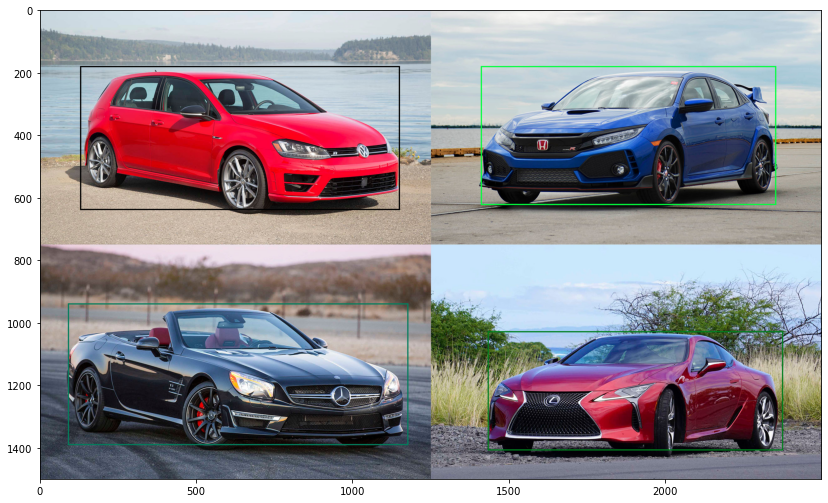

In [8]:
print("PREDICTED BOXES")
fig = plt.figure(figsize=(14, 10))
sample = img
img_int = torch.tensor(sample * 255, dtype=torch.uint8)
plt.imshow(draw_bounding_boxes(img_int,
    nms_prediction['boxes'][nms_prediction['scores'] > 0.8], width=4
).permute(1, 2, 0))